<a href="https://colab.research.google.com/github/Monisha-11/basic-nn-model/blob/main/DLEXP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [ ]:
worksheet = gc.open('EXP1').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT[X]':'float'})
dataset1 = dataset1.astype({'OUTPUT[Y]':'float'})

In [ ]:
dataset1.head()

,INPUT[X],OUTPUT[Y]
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
X = dataset1[['INPUT[X]']].values
Y = dataset1[['OUTPUT[Y]']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
X_train1


array([[0.77777778],
       [0.37037037],
       [1.        ],
       [0.74074074],
       [0.40740741],
       [0.88888889],
       [0.        ],
       [0.81481481],
       [0.44444444],
       [0.33333333],
       [0.48148148],
       [0.66666667],
       [0.18518519],
       [0.07407407],
       [0.2962963 ],
       [0.62962963],
       [0.03703704],
       [0.85185185],
       [0.22222222],
       [0.7037037 ]])

In [ ]:
ai=Sequential([
    Dense(6,activation='relu'),
    Dense(12,activation='relu'),
    Dense(1)
])
ai.compile(optimizer='rmsprop',loss='mse')
ai.fit(X_train1,y_train,epochs=2000)
ai.fit(X_train1,y_train,epochs=2000)

Streaming output truncated to the last 5000 lines.
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 30420.8633
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 30416.6562
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 30413.1348
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 30410.0156
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 30407.1523
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 30404.4648
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 30401.9102
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: 30399.4336
Epoch 10/2000
1/1 [==============================] - 0s 16ms/step - loss: 30396.9941
Epoch 11/2000
1/1 [==============================] - 0s 11ms/step - loss: 30394.6348
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 30392.3652
Epoch 13/2000
1/1 [===

<Axes: >

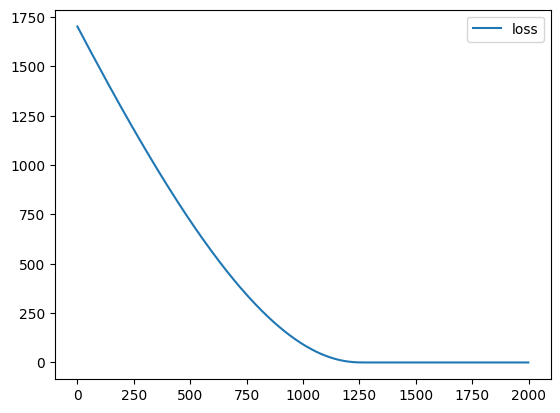

In [ ]:
## Plot the loss
loss_df = pd.DataFrame(ai.history.history)
loss_df.plot()


In [ ]:
## Evaluate the model
X_test1 = Scaler.transform(X_test)
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 146ms/step - loss: 0.0183


0.01829444244503975

In [ ]:
# Prediction
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
ai.predict(X_n1_1)

1/1 [==============================] - 0s 94ms/step


array([[301.05594]], dtype=float32)